In [1]:
import os
os.environ[ "TF_CPP_MIN_LOG_LEVEL"] = "3"
import tensorflow as tf
tf.compat.v1.logging.set_verbosity( tf.compat.v1.logging.ERROR)
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
dataset, info = tfds.load( "imdb_reviews/subwords8k", with_info=True, as_supervised=True)

tokenizer = info.features[ "text"].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

train_data, test_data = dataset[ "train"], dataset[ "test"]

train_dataset = train_data.shuffle( BUFFER_SIZE)

train_dataset = train_dataset.padded_batch( BATCH_SIZE)
test_dataset = test_data.padded_batch( BATCH_SIZE)

In [5]:
embedding_dim = 64
lstm1_dim = 64
lstm2_dim = 32
dense_dim = 64

model = tf.keras.Sequential( [
	tf.keras.layers.Embedding( tokenizer.vocab_size, embedding_dim),
	tf.keras.layers.Bidirectional( tf.keras.layers.LSTM( lstm1_dim, return_sequences=True)),
	tf.keras.layers.Bidirectional( tf.keras.layers.LSTM( lstm2_dim)),
	tf.keras.layers.Dense( dense_dim, activation="relu"),
	tf.keras.layers.Dense( 1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirection  (None, None, 128)         66048     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                41216     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 635329 (2.42 MB)
Trainable params: 635329 

In [6]:
model.compile(
	loss="binary_crossentropy",
	optimizer="adam",
	metrics=[ "accuracy"]
)

In [7]:
NUM_EPOCHS = 10

history = model.fit(
	train_dataset,
	epochs=NUM_EPOCHS,
	validation_data=test_dataset
)

Epoch 1/10
98/98 [==============================] - 64s 538ms/step - loss: 0.5473 - accuracy: 0.7118 - val_loss: 0.4354 - val_accuracy: 0.8075
Epoch 2/10
98/98 [==============================] - 48s 492ms/step - loss: 0.3439 - accuracy: 0.8620 - val_loss: 0.3936 - val_accuracy: 0.8294
Epoch 3/10
98/98 [==============================] - 46s 465ms/step - loss: 0.2439 - accuracy: 0.9080 - val_loss: 0.3850 - val_accuracy: 0.8523
Epoch 4/10
98/98 [==============================] - 55s 557ms/step - loss: 0.2714 - accuracy: 0.8955 - val_loss: 0.4208 - val_accuracy: 0.8363
Epoch 5/10
98/98 [==============================] - 44s 447ms/step - loss: 0.1689 - accuracy: 0.9403 - val_loss: 0.4350 - val_accuracy: 0.8328
Epoch 6/10
98/98 [==============================] - 43s 436ms/step - loss: 0.1333 - accuracy: 0.9562 - val_loss: 0.5379 - val_accuracy: 0.8208
Epoch 7/10
98/98 [==============================] - 42s 428ms/step - loss: 0.1015 - accuracy: 0.9687 - val_loss: 0.5771 - val_accuracy: 0.8094

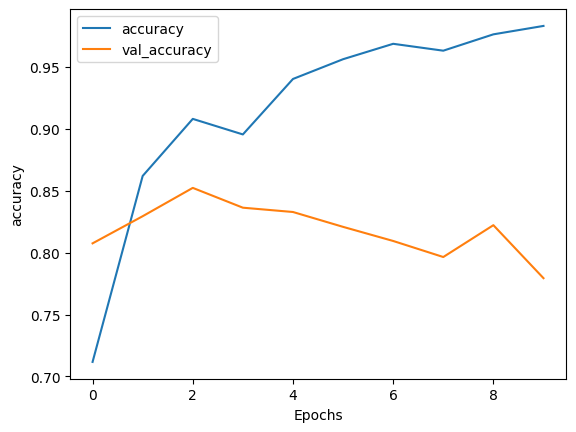

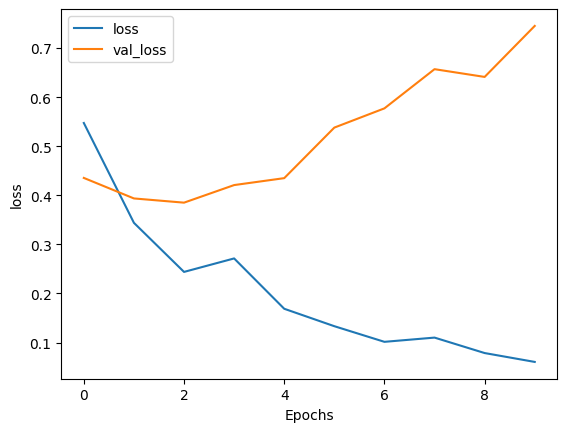

In [8]:
def plot_graphs( history, string):
	plt.plot( history.history[ string], label=string)
	plt.plot( history.history[ f"val_{ string}"], label=f"val_{ string}")
	plt.xlabel( "Epochs")
	plt.ylabel( string)
	plt.legend()
	plt.show()

plot_graphs( history, "accuracy")
plot_graphs( history, "loss")